In [23]:
import pandas as pd

df = pd.read_csv("AGC_Data.csv")

In [24]:
data_1 = {"date":df.index+1, "data":df["speed"].values, "cols":["col_0"]*len(df)}
data_2 = {"date":df.index+1, "data":df["arrival"].values, "cols":["label"]*len(df)}
data = pd.concat([pd.DataFrame(data_1), pd.DataFrame(data_2)], axis=0)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    200000 non-null  int64 
 1   data    200000 non-null  int64 
 2   cols    200000 non-null  object
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [25]:
data.head()

,date,data,cols
0,1,62519,col_0
1,2,62897,col_0
2,3,62323,col_0
3,4,62798,col_0
4,5,62558,col_0


In [26]:
data.tail()

,date,data,cols
99995,99996,0,label
99996,99997,0,label
99997,99998,0,label
99998,99999,0,label
99999,100000,0,label


In [29]:
data.iloc[:, 2].value_counts().max()

np.int64(100000)

In [30]:
def read_data(path: str, nrows=None) -> pd.DataFrame:
    data = pd.read_csv(path)
    label_exists = "label" in data["cols"].values
    all_points = data.shape[0]
    columns = data.columns
    if columns[0] == "date":
        n_points = data.iloc[:, 2].value_counts().max()
    else:
        n_points = data.iloc[:, 1].value_counts().max()
    is_univariate = n_points == all_points
    n_cols = all_points // n_points
    df = pd.DataFrame()
    cols_name = data["cols"].unique()
    if columns[0] == "date" and not is_univariate:
        df["date"] = data.iloc[:n_points, 0]
        col_data = {
            cols_name[j]: data.iloc[j * n_points : (j + 1) * n_points, 1].tolist()
            for j in range(n_cols)
        }
        df = pd.concat([df, pd.DataFrame(col_data)], axis=1)
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
    elif columns[0] != "date" and not is_univariate:
        col_data = {
            cols_name[j]: data.iloc[j * n_points : (j + 1) * n_points, 0].tolist()
            for j in range(n_cols)
        }
        df = pd.concat([df, pd.DataFrame(col_data)], axis=1)
    elif columns[0] == "date" and is_univariate:
        df["date"] = data.iloc[:, 0]
        df[cols_name[0]] = data.iloc[:, 1]
        df["date"] = pd.to_datetime(df["date"])
        df.set_index("date", inplace=True)
    else:
        df[cols_name[0]] = data.iloc[:, 0]
    if label_exists:
        last_col_name = df.columns[-1]
        df.rename(columns={last_col_name: "label"}, inplace=True)
    if nrows is not None and isinstance(nrows, int) and df.shape[0] >= nrows:
        df = df.iloc[:nrows, :]
    return df

In [32]:
data = read_data("AGC_Data_modified.csv")
        # 2.train
train_data = data.iloc[:80000, :]
train_data, train_label =  (
            train_data.loc[:, train_data.columns != "label"].to_numpy(),
            train_data.loc[:, ["label"]].to_numpy(),
)

In [35]:
train_data.shape

(80000, 1)

In [37]:
import numpy as np
discrete_channels = range(1, 55)
train_data = np.delete(train_data, discrete_channels, axis=0)

In [27]:
data.to_csv("AGC_Data_modified.csv", index=False)

In [14]:
msl = pd.read_csv("MSL.csv")

In [18]:
msl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7394576 entries, 0 to 7394575
Data columns (total 3 columns):
 #   Column  Dtype  
---  ------  -----  
 0   date    int64  
 1   data    float64
 2   cols    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 169.2+ MB


In [17]:
msl["date"].nunique()

132046

In [20]:
msl[msl["date"]==1]

,date,data,cols
0,1,2.146646,col_0
132046,1,0.000000,col_1
264092,1,0.000000,col_2
396138,1,0.000000,col_3
528184,1,0.000000,col_4
660230,1,0.000000,col_5
792276,1,0.000000,col_6
924322,1,0.000000,col_7
1056368,1,0.000000,col_8
1188414,1,0.000000,col_9


In [ ]:
import pandas as pd

result = pd.read_csv("result.csv")

In [10]:
result.head()

,Actual_Label,Anomaly_Score
0,0.0,0.047704
1,0.0,0.208194
2,0.0,0.007069
3,0.0,0.030331
4,0.0,0.249624


In [3]:
result[result["Actual_Label"] == 1].head()

,Actual_Label,Anomaly_Score
1183,1.0,4.416190
1184,1.0,2.522431
1185,1.0,4.857083
1186,1.0,5.097725
1187,1.0,5.042953


In [8]:
mean = result[result["Actual_Label"] == 1]["Anomaly_Score"].mean()
std = result[result["Actual_Label"] == 1]["Anomaly_Score"].std()

In [9]:
print(mean)

2.1977937099999996


In [12]:
print(std)

1.581344580131474


In [15]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix, f1_score, precision_score, recall_score

In [14]:
actual_labels = result['Actual_Label']
anomaly_scores = result['Anomaly_Score']

In [16]:
fpr, tpr, thresholds_roc = roc_curve(actual_labels, anomaly_scores)
roc_auc = auc(fpr, tpr)

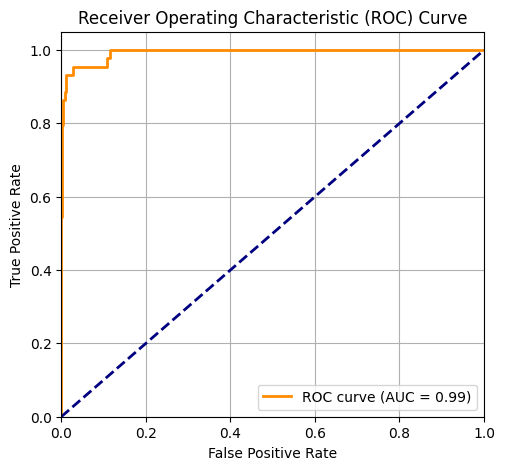

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)

In [18]:
precision, recall, thresholds_pr = precision_recall_curve(actual_labels, anomaly_scores)
auc_pr = auc(recall, precision)

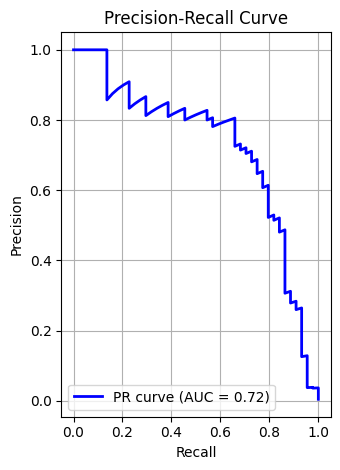

AUC-ROC: 0.9929
AUC-PR: 0.7230


In [19]:
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"AUC-ROC: {roc_auc:.4f}")
print(f"AUC-PR: {auc_pr:.4f}")

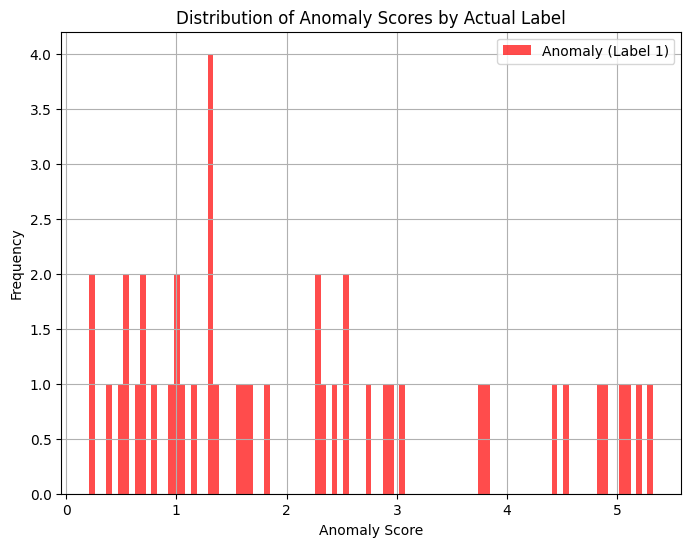

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(anomaly_scores[actual_labels == 0], bins=100, alpha=0.7, label='Normal (Label 0)', color='green')
plt.hist(anomaly_scores[actual_labels == 1], bins=100, alpha=0.7, label='Anomaly (Label 1)', color='red')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.title('Distribution of Anomaly Scores by Actual Label')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import numpy as np

f_scores = []
for i in range(len(thresholds_pr)):
    if precision[i] + recall[i] > 0:
        f_scores.append(2 * (precision[i] * recall[i]) / (precision[i] + recall[i]))
    else:
        f_scores.append(0)

# Handle the case where thresholds_pr might be empty or problematic
if len(f_scores) > 0:
    optimal_idx = np.argmax(f_scores)
    optimal_threshold = thresholds_pr[optimal_idx]
    print(f"\nOptimal threshold (maximizing F1-score): {optimal_threshold:.4f}")

    # Apply the chosen threshold
    predicted_labels = (anomaly_scores >= optimal_threshold).astype(int)

    # Calculate confusion matrix
    cm = confusion_matrix(actual_labels, predicted_labels)
    print("\nConfusion Matrix:")
    print(cm)

    tn, fp, fn, tp = cm.ravel()

    # Calculate other metrics
    precision_val = precision_score(actual_labels, predicted_labels, zero_division=0)
    recall_val = recall_score(actual_labels, predicted_labels, zero_division=0)
    f1_val = f1_score(actual_labels, predicted_labels, zero_division=0)
    accuracy_val = (tp + tn) / (tp + tn + fp + fn)

    print(f"Precision: {precision_val:.4f}")
    print(f"Recall: {recall_val:.4f}")
    print(f"F1-Score: {f1_val:.4f}")
    print(f"Accuracy: {accuracy_val:.4f}")
    print(f"False Positive Rate (FPR): {fp / (fp + tn):.4f}")
else:
    print("\nCould not calculate optimal threshold for F1-score (likely due to no anomalies detected or very few data points).")


Optimal threshold (maximizing F1-score): 1.2971

Confusion Matrix:
[[9949    7]
 [  15   29]]
Precision: 0.8056
Recall: 0.6591
F1-Score: 0.7250
Accuracy: 0.9978
False Positive Rate (FPR): 0.0007


In [28]:
if len(precision) > 1:
    search_precision = precision[:-1]
    search_recall = recall[:-1]
    search_thresholds = thresholds_pr

    if len(search_precision) > 0:
        # Find the index where precision is maximized
        optimal_idx_precision = np.argmax(search_precision)
        optimal_threshold_precision = search_thresholds[optimal_idx_precision]

        print(f"\nOptimal threshold (maximizing Precision): {optimal_threshold_precision:.4f}")

        # Apply the chosen threshold
        predicted_labels_precision = (anomaly_scores >= optimal_threshold_precision).astype(int)

        # Calculate confusion matrix
        cm_precision = confusion_matrix(actual_labels, predicted_labels_precision)
        print("\nConfusion Matrix (at max Precision threshold):")
        print(cm_precision)

        tn, fp, fn, tp = cm_precision.ravel()

        # Calculate other metrics
        precision_val = precision_score(actual_labels, predicted_labels_precision, zero_division=0)
        recall_val = recall_score(actual_labels, predicted_labels_precision, zero_division=0)
        f1_val = f1_score(actual_labels, predicted_labels_precision, zero_division=0)
        accuracy_val = (tp + tn) / (tp + tn + fp + fn)

        print(f"Precision: {precision_val:.4f}")
        print(f"Recall: {recall_val:.4f}")
        print(f"F1-Score: {f1_val:.4f}")
        print(f"Accuracy: {accuracy_val:.4f}")
        print(f"False Positive Rate (FPR): {fp / (fp + tn):.4f}")
    else:
        print("\nCould not calculate optimal threshold for Precision (no valid points on PR curve after filtering).")
else:
    print("\nCould not calculate optimal threshold for Precision (likely due to very few data points or no anomalies).")


Optimal threshold (maximizing Precision): 4.8571

Confusion Matrix (at max Precision threshold):
[[9956    0]
 [  38    6]]
Precision: 1.0000
Recall: 0.1364
F1-Score: 0.2400
Accuracy: 0.9962
False Positive Rate (FPR): 0.0000
